### Figures for thermal stability paper and visualization of BglB data set 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
# import matplotlib.colors as mcolors
# from matplotlib import rc, cm

import pandas
from numpy import log10, log2, inf, nan 

In [2]:
df = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 )

Such as the number of sequence positions mutated

In [3]:
len( df.sequence_pos.unique() ) 

68

or how could you quickly select them in PyMOL? You could use: 

In [4]:
s = '+'.join( [ i for i in df.sequence_pos.dropna().astype( int ).astype( str ) ] ) 
print 'select all_mutants, resi', s 

select all_mutants, resi 12+14+15+16+16+17+17+18+19+19+19+19+32+34+52+72+76+91+101+119+119+119+120+120+120+121+154+163+163+163+163+163+164+164+164+166+167+167+171+171+175+177+177+177+178+178+192+218+220+220+220+220+220+221+222+222+222+222+222+222+236+240+240+240+240+244+244+249+261+293+293+293+293+293+294+294+294+295+295+296+296+298+300+313+315+315+323+323+325+325+325+325+325+325+329+331+341+343+352+353+354+355+358+362+373+379+379+399+399+399+399+399+400+403+404+404+406+406+407+407+407+407+407+407+409+415+415+423


List of mutants that do not express? 

In [5]:
df[( df.expression < 1 )].index

Index([u'G12N', u'S16N', u'Q19P', u'S32L', u'W34A', u'F72H', u'R76A', u'H119E',
       u'W120A', u'D121F', u'N163K', u'N163E', u'E164G', u'E164R', u'Y166P',
       u'H178R', u'M221A', u'E222Y', u'E222R', u'A236E', u'R240E', u'I244N',
       u'A249E', u'M261D', u'N293D', u'N293K', u'Y294L', u'T296E', u'T296A',
       u'H315N', u'M323K', u'W325R', u'W325G', u'P329N', u'F343S', u'G355A',
       u'H379T', u'W399A', u'D403A', u'W407Y', u'W407A', u'W407Q', u'W407R',
       u'W407G', u'W407K'],
      dtype='object', name=u'mutant')

### Conservation along BglB sequence 

In [6]:
# alignment of 1554 Pfam sequences that we trimmed by hand to have catalytic residues 
# as in previous paper 

dat = pandas.read_csv( 'alignments/logo-data-bagel-aligned.txt', sep='\s+' ) 
dat['sequence_pos'] = dat.index + 1 

In [7]:
aas = [ u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'V', u'W', u'Y' ]

In [8]:
clean_dat = dat[ aas ] # + [ 'amino_acid' ] ].copy()
clean_dat.index = dat.amino_acid 

percents = []
for idx, row in clean_dat.iterrows():
    #print idx, row[ idx.upper() ].astype( float ) / row.sum() * 100, 'per cent', idx 
    percents.append( row[ idx.upper() ].astype( float ) / row.sum()  )
    
clean_dat['percents'] = percents
clean_dat['sequence_pos'] = range( 1, 446 ) 

/usr/local/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


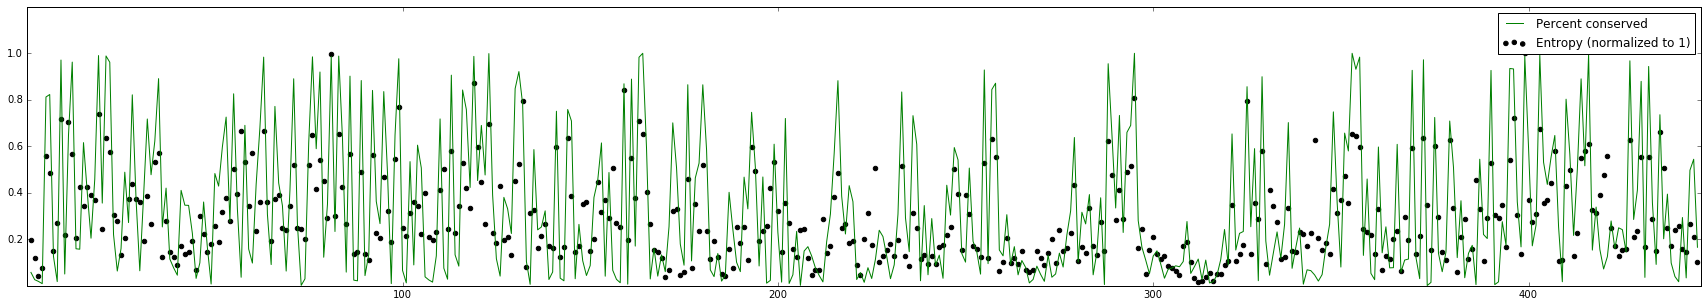

    amino_acid     #   A  C   D   E   F   G    H    I      ...        T    V  \
257          p  1797  11  0  15   1   0   3    4    1      ...       33    0   
379          l  2570   8  2   0   0  69   1    0  514      ...       16  111   
418          h  2877  53  2  23  83  72  22  246    0      ...       25    3   

      W    Y  Entropy     Low    High  Weight    1  sequence_pos  
257   0    0   2.3370  2.2699  2.4042  0.8999  259           258  
379  16    2   1.4214  1.3662  1.4765  0.9987  381           380  
418  18  847   1.6425  1.5741  1.7110  0.9918  420           419  

[3 rows x 28 columns]


In [9]:
plt.figure( figsize=( 30, 5 ) ) 
plt.scatter( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) ,color='k', label='Entropy (normalized to 1)' )
#plt.bar( clean_dat.sequence_pos, clean_dat.percents, lw=0, color='blue', label='Percent conserved' ) 
plt.plot( clean_dat.sequence_pos, clean_dat.percents, color='g', label='Percent conserved' ) 

plt.xlim( 0, 446 ) 
plt.ylim( 0, 1.2 ) 
plt.xticks( [ 100, 200, 300, 400 ] ) 
plt.yticks( [ 0.2, 0.4, 0.6, 0.8, 1. ] ) 
plt.legend()
plt.show()

print dat.sample( 3 )

In [10]:
my_percent_conserved = clean_dat[ [ 'sequence_pos', 'percents' ] ]
my_percent_conserved.index = my_percent_conserved.sequence_pos
my_dict = dict( my_percent_conserved.percents ) 

![](alignments/F6B7098C-2EC8-11E6-91A5-F81477086C57.png)

In [11]:
# heat map 

h_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'sequence_pos' ] 
h = df[ h_cols ].copy()

h.tm = h.tm - 39.9 
h.kcat = log10( h.kcat / 880 ) 
h.km = log10( (1/h.km) / (1/5.) )
h.kcatkm = log10( h.kcatkm / 174000 )  
h.expression = h.expression # boolean 
h['percent_conserved'] = h.sequence_pos.map( my_dict )

h.replace( [ -inf ], -5, inplace=True )
h.sample( 5 )

# sanity check, what are the WT values after this procedure?  
print h.loc[ 'BglB' ] 

expression           1.0
tm                   0.0
kcat                 0.0
km                   0.0
kcatkm               0.0
sequence_pos         NaN
percent_conserved    NaN
Name: BglB, dtype: float64


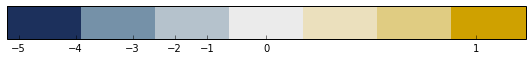

In [46]:
# color map 

from matplotlib import pyplot
import matplotlib as mpl

# Make a figure and axes with dimensions as desired.
fig = pyplot.figure(figsize=(8, 3))
ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

# The third example illustrates the use of custom length colorbar
# extensions, used on a colorbar with discrete intervals.
cmap = mpl.colors.ListedColormap([
    ( .11, .19, .36 ), # deep blue
    ( .46, .57, .66 ), # medium blue
    ( .71, .76, .80 ), # light blue 
    ( .92, .92, .92 ), # grey 
    ( .92, .88, .74 ), # light yellow
    ( .88, .80, .51 ), # medium yellow 
    ( .81, .63, 0. )   # deep yellow 
])

cmap.set_over((1., 0., 0.))
cmap.set_under((0., 0., 1.))

bounds = [-5.2, -3.9, -2.6, -.3, .3, .6, .9, 1.2 ]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, ticks=[-5, -4, -2, -3, -1, 0, 1], orientation='horizontal')
pyplot.show()

In [47]:
h.describe()

,expression,tm,kcat,km,kcatkm,sequence_pos,percent_conserved
count,129.000000,62.000000,80.000000,80.000000,92.000000,128.000000,128.000000
mean,0.651163,-0.811290,-0.836934,-0.172412,-1.449682,241.531250,0.499220
std,0.478460,1.680369,0.948346,0.391784,1.515885,122.181737,0.355953
min,0.000000,-7.000000,-2.944483,-1.251297,-4.240549,12.000000,0.001263
25%,0.000000,-1.550000,-1.420832,-0.449388,-2.494305,163.750000,0.137997
50%,1.000000,-0.550000,-0.466783,-0.124163,-0.966352,240.000000,0.516149
75%,1.000000,0.075000,-0.107210,0.003057,-0.238911,333.500000,0.856407
max,1.000000,2.700000,1.097344,1.096910,0.955350,423.000000,1.000000


['expression', 'tm', 'kcat', 'km', 'kcatkm', 'sequence_pos']


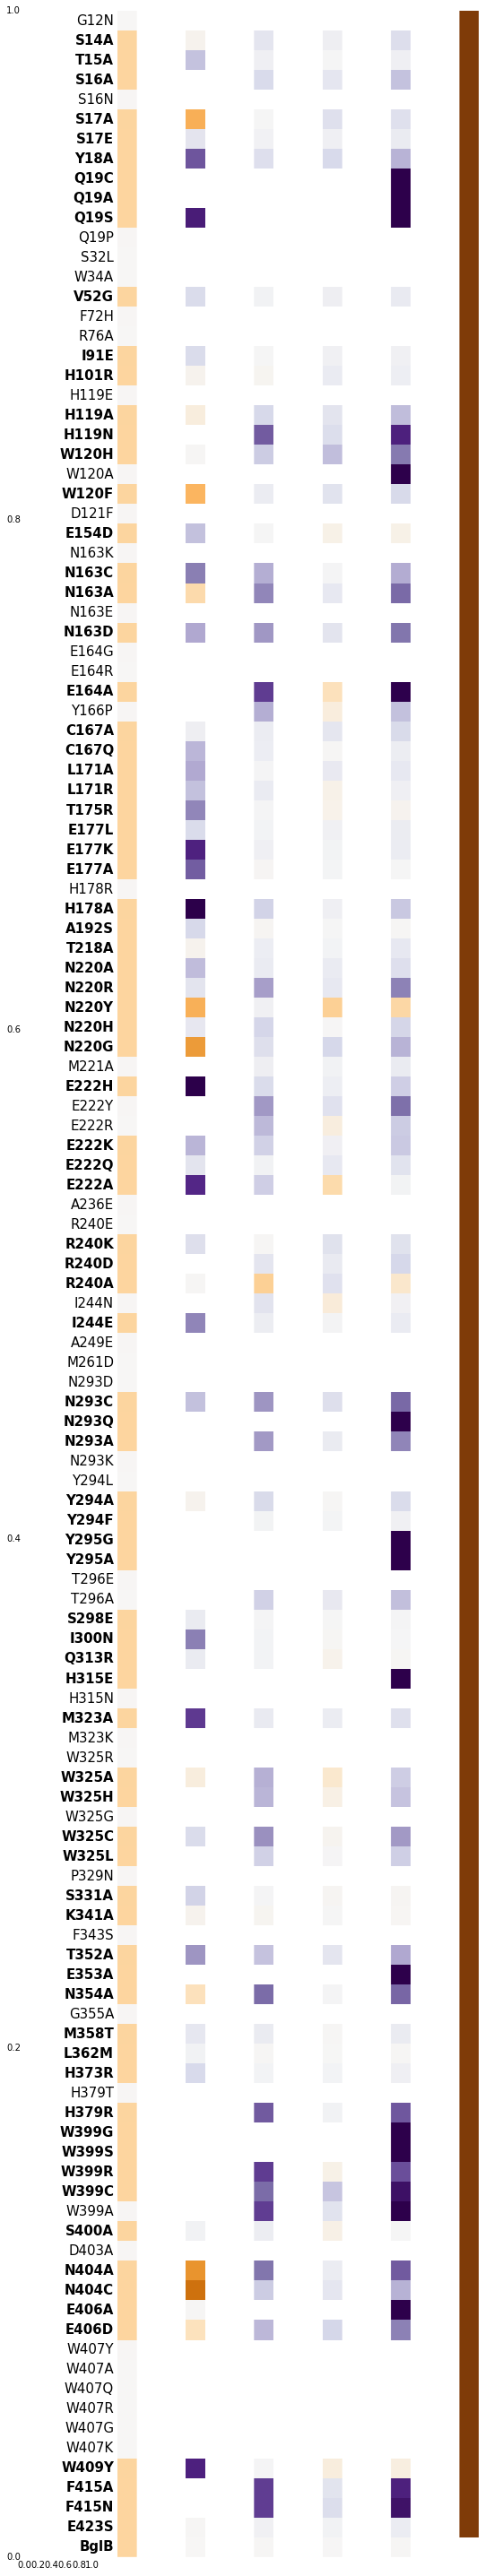

In [93]:
print h_cols

plt.figure( figsize=(8,40) ) 

for i in range( 1 ):
    plt.subplot( 1, 7, i+1 )
    plt.tick_params( length=0 ) 
    plt.box( 0 ) 

for i, col in enumerate( h_cols ):
    plt.subplot( 1, 7, i+2 )
    #plt.yticks( range( len( h.index ) ), h.index )
    plt.imshow( h[ [ col ] ], interpolation='none', cmap='PuOr_r', vmin=-4, vmax=4 )
    plt.xticks([]); plt.yticks([]) 
    plt.tick_params( length=0 ) 
    plt.box( 0 ) 

for i, r in enumerate( h.index ):
    if df.loc[ r ][ 'expression' ] == 1:
        font = { 'weight': 'bold', 'horizontalalignment': 'right', 'fontsize': 15 }
        plt.text( -18, i+0.2, r, fontdict=font )
    else:
        #font = { 'color':  'white', 'weight': 'bold', 'horizontalalignment': 'right' }
        #plt.text( -12, i+0.1, r, fontdict=font, bbox=dict(facecolor='0', linewidth=0))
        font = { 'horizontalalignment': 'right', 'fontsize': 15 }
        plt.text( -18, i+0.2, r, fontdict=font )     

plt.tight_layout()
plt.savefig( 'heatmap_out.png', dpi=600 ) 

In [15]:
# bar plot style 

b_cols = [ 'kcat', 'err_kcat', 'km', 'err_km', 'kcatkm', 'err_kcatkm' ] 
j = df[ b_cols ].copy()
j.km = j.km + 1 
j = log10( j ) 
j['expression'] = df.expression
j['expression_err'] = 0
print j.sample( 5 ) 

            kcat  err_kcat        km    err_km    kcatkm  err_kcatkm  \
mutant                                                                 
G12N         NaN       NaN       NaN       NaN       NaN         NaN   
T175R   2.903633  0.903090  0.661813 -0.823909  5.348369    3.985112   
W325A   1.462398  0.000000  0.416641 -0.638272  4.261096    3.416141   
H178A   2.053078  0.477121  0.938019 -0.136677  4.167229    3.165244   
S298E   2.907949  0.301030  0.797960 -1.301030  5.185440    3.143327   

        expression  expression_err  
mutant                              
G12N             0               0  
T175R            1               0  
W325A            1               0  
H178A            1               0  
S298E            1               0  


In [16]:
j.loc['BglB']

kcat              2.944483
err_kcat          1.000000
km                0.778151
err_km           -0.698970
kcatkm            5.240549
err_kcatkm        3.903090
expression        1.000000
expression_err    0.000000
Name: BglB, dtype: float64

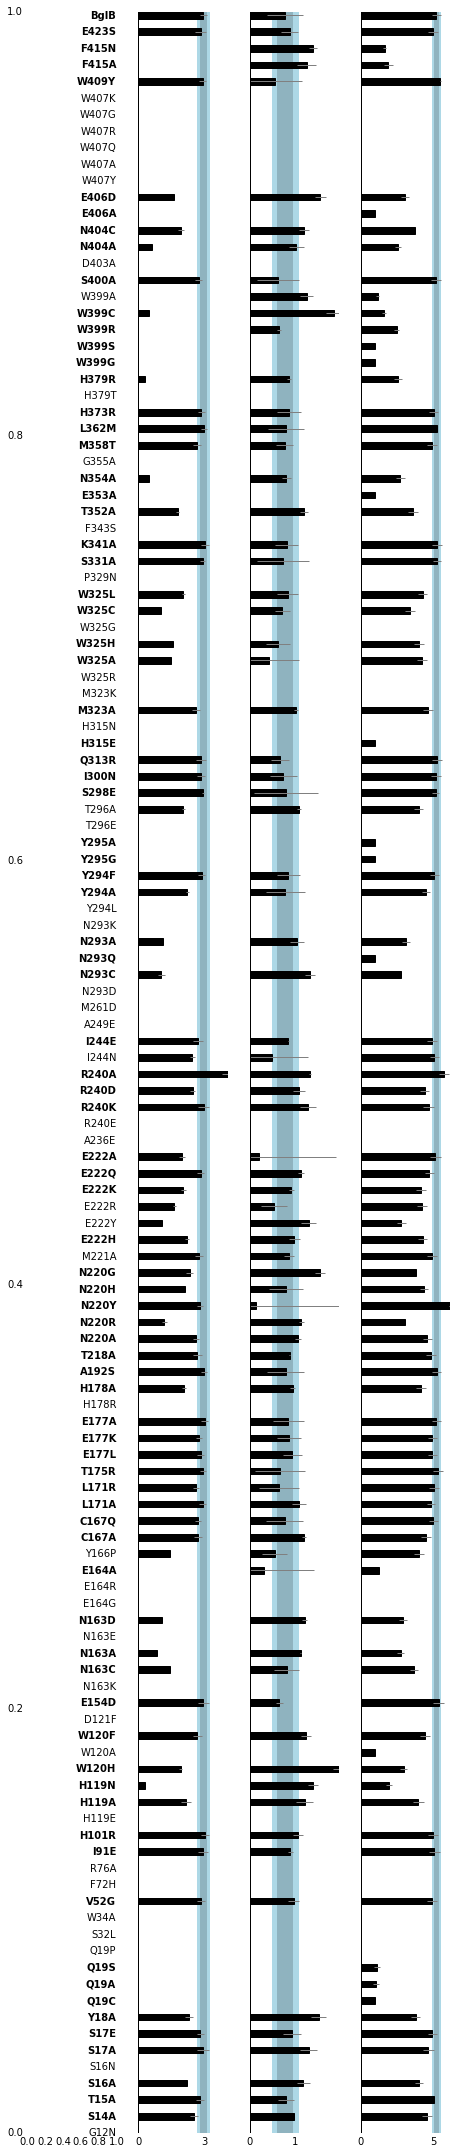

In [99]:
#http://faculty.washington.edu/stuve/log_error.pdf
#describes how to log error bars 

plt.figure( figsize=(8,30) ) 

bar_cols = [ 
    ( 'kcat', 'err_kcat' ), 
    ( 'km', 'err_km' ), 
    ( 'kcatkm', 'err_kcatkm' ), 
    #( 'expression', 'expression_err' ) 
]

plt.subplot( 1, 5, 1 )
plt.tick_params( length=0 ) 
plt.box( 0 ) 

for i, ( col, err ) in enumerate( bar_cols ):
    plt.subplot( 1, 5, i+2 )
    x_vals = [ i for i in range( len( h ) ) ]
    plt.barh( x_vals, j[col], color='k', height=0.4, edgecolor=None, 
        xerr=0.434*j[err]/j[col],
        ecolor='gray', capsize=0, align='center' )
    plt.tick_params( length=0 ) 
    #plt.yticks( range( len( j.index ) ), j.index )
    plt.yticks([])

    my_val = j.loc['BglB'][ col ]              
    plt.fill_between( [my_val - 0.3, my_val + 0.3], 128.2, color='lightblue', linewidth=0 ) 
    plt.fill_between( [my_val - 0.17, my_val + 0.17], 128.2, color=(0,0,0,0.17), linewidth=0 ) 
    
    plt.xticks( [ 0, my_val.round() ] )
    plt.box( 0 ) 
    
    plt.plot( ( 0, 0 ), ( 0, 128.2 ), color='k' ) 

for i, r in enumerate( h.index ):
    if df.loc[ r ][ 'expression' ] == 1:
        font = { 'weight': 'bold', 'horizontalalignment': 'right' }
        plt.text( -17, i-.2, r, fontdict=font )
    else:
        font = { 'horizontalalignment': 'right' }
        plt.text( -17, i-.2, r, fontdict=font )      

plt.tight_layout()
plt.savefig( 'heatmap_out.png', dpi=600 ) 

In [18]:
# machine learning results 